# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Loading the dataset¶

In [2]:
data=pd.read_csv('Placement_Data.csv')


# Exploratory Data Analysis and Visualization

# Displaying information about csv file¶

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


# To check columns having null values

In [4]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

# Salary column has 67 null values .Need to fix this.Lets replace null values by 0.

In [5]:
data['salary'].fillna(0,inplace = True)


In [6]:
data.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

# To display count of total entries in dataset

In [7]:
len(data)

215

# To view first five entries in the file

In [8]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# More the degree percentage more is the probability of placement.

<Axes: xlabel='mba_p', ylabel='degree_p'>

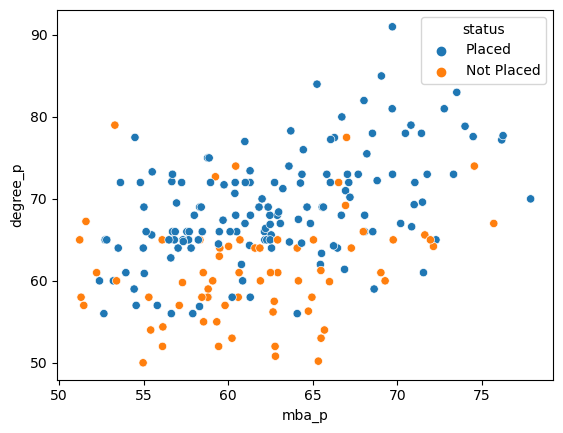

In [45]:
sns.scatterplot(x = 'mba_p' , y = 'degree_p' , data = data , hue = 'status' )

# Display number of students in each steam ie: Science/commerce /arts 12th

In [13]:
b = data.groupby('hsc_s')['sl_no'].count().reset_index()

In [14]:
b

,hsc_s,sl_no
0,Arts,11
1,Commerce,113
2,Science,91


In [15]:
label = b['hsc_s']
values = b['sl_no']

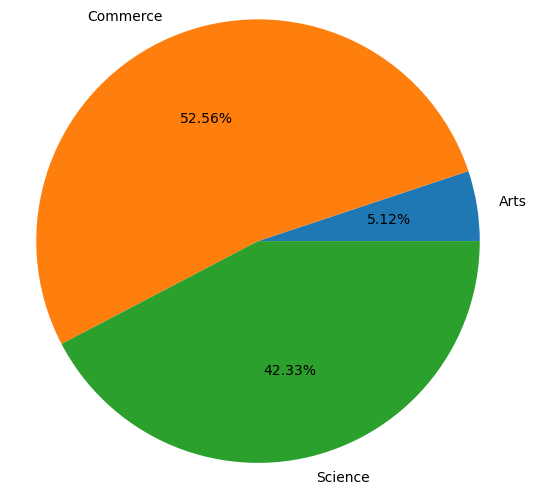

In [16]:
plt.axis("equal")
plt.pie(values,labels = label,radius=1.5,autopct='%0.2f%%')
plt.show()

# Students who have more ssc percentage got placement .People below 50% were unplaced .

<Axes: xlabel='status', ylabel='ssc_p'>

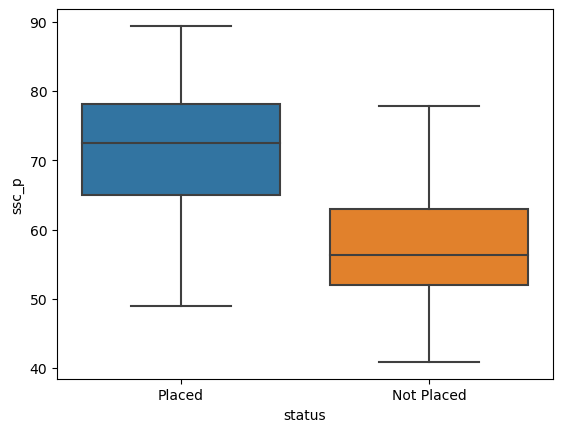

In [32]:
sns.boxplot(x = 'status' , y = 'ssc_p' , data = data )

# Highest score in each domain achieved

In [22]:
c = data.groupby('gender')['sl_no'].count().reset_index()

In [23]:
c

,gender,sl_no
0,F,76
1,M,139


In [24]:
label = c['gender']
values = c['sl_no']

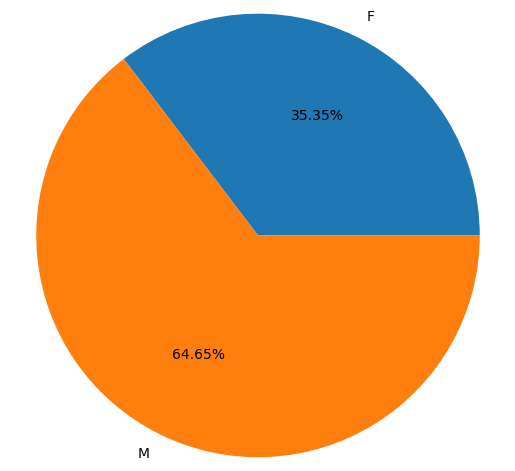

In [50]:
plt.axis("equal")
plt.pie(values,labels = label,radius=1.5,autopct='%0.2f%%')
plt.show()

# Salaries for Sci&tech are higher than the other two streams.

<Axes: xlabel='degree_t', ylabel='count'>

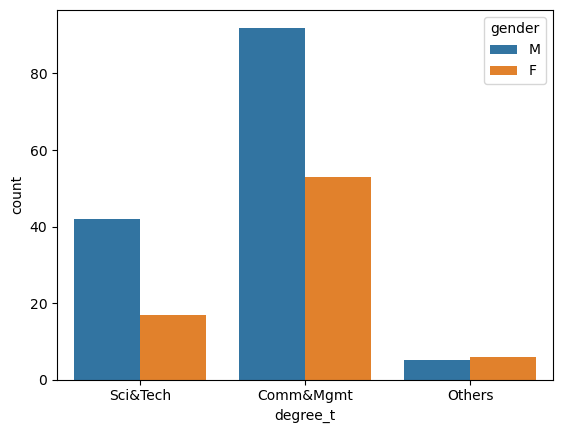

In [47]:
sns.countplot(x = 'degree_t' , data =data , hue = 'gender')